# Regression Basics

- <font size=3>https://reurl.cc/1xAALp</font>

# 載入常用程式庫及常數定義

In [ ]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/My Drive/adventures/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '/Google Drive/adventures/'

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', size=14)

from datetime import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >= "0.20"
import seaborn as sns
import pandas as pd
import numpy as np
import math
import os
import sys
import gdown
import requests
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from pandas.plotting import register_matplotlib_converters

figure_dir = groot_dir + 'regression/'
data_dir = groot_dir + 'regression/'

gfigure = lambda name: figure_dir + name + '.png'
output_fig = lambda name: plt.savefig( gfigure(name), dpi = 300)

local_time = lambda x, offset: x + relativedelta(hours= offset)
def local_now(hours = 8):
    return datetime.now() + relativedelta(hours = hours if in_colab else 0)

def print_now():
    return print(local_now())

def print_local_now():
    return print('Local Time:', local_now())

def DropboxLink(did, fname):
    return 'https://dl.dropboxusercontent.com/s/%s/%s' % \
    (did, fname)

def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)

def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath
        
def acct_string(num):
    s0 = str(num)
    if len(s0) <=3:
        return s0  
    num_section = int(len(s0)/3)
    remaining_start = len(s0) % 3
    s = s0[:remaining_start]
    for i in range(num_section):
        s += ',%s' % s0[remaining_start + i*3 :remaining_start + (i+1)*3]   
    return s

EX1DATA = '147xBeCECYur0FxDyly-oG2BqsqEH2Mxm'
EX1DATA2 = '101qw-9OkjCxwuSkBJUBaGURRWpZbFKOe'
EX5DATA = '1nNM8CN9CkRfjipRx1qJYZhSobmABVL1J'
ADVER = '1xFMcCuiMgX9VnelDtbyyV9rXBMFerx8k'
TAIWAN_CSV = '1I5yqulrZSHPSQkxT3oqt_3uVAhPolOEP'
JHU_CSSE = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/'
MNIST_TRAIN = '1E-uJ0zqqAfpsVjoOSzqF5TXhDfPNlkQ5'
MNIST_TRAIN_LABEL = '13clNJ2cd2I90W3DEkDBKjZSDNNEqqx3B'
MNIST_TEST = '1zVpVHJl5YABa3qExt1K-O3WaEHXTJekg'
MNIST_TEST_LABEL = '1qci_-dqubnRN-cdrCsbYaUAxyO7_jH9z'

print('\nRunning on %s' % sys.platform)
print('Python Version', sys.version)
print('Data storage points to ==>', data_dir)

print('\nThis module is amied to leran regression basics...') 
print('\nLibraries and dependenciess imported')
print_local_now()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Running on linux
Python Version 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
Data storage points to ==> /content/drive/My Drive/adventures/regression/

This module is amied to leran regression basics...

Libraries and dependenciess imported
Local Time: 2020-06-29 20:08:29.455471


# 練習資料從哪裏來？

- [UCI regression datasets](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)
- [sklearn datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)
- [sklearn: Generated Datasets](https://scikit-learn.org/stable/datasets/index.html#sample-generators)
    - [sklearn: make_gression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression)

## make_regression

- [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html?highlight=make_regression#sklearn.datasets.make_regression)

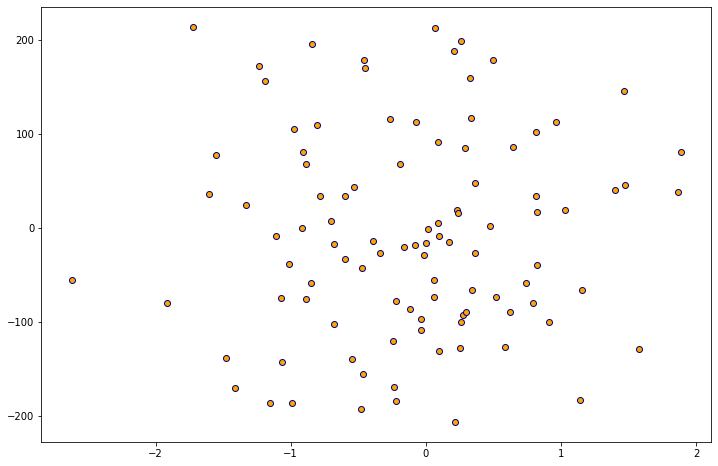

In [ ]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

X0, y = make_regression(n_samples = 100, n_features = 2, 
    bias = 0.1, noise = 0.1, random_state = 42)
X = np.sort(X0[:,0]).reshape(-1,1)

fig,ax = plt.subplots(figsize=(12, 8))
plt.scatter(X, y, color = 'orange', edgecolor = 'navy')

## create dataset on your own

- [numpy rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html?highlight=rand#numpy.random.rand)
- [numpy randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html?highlight=randn#numpy.random.randn)

(100, 1)


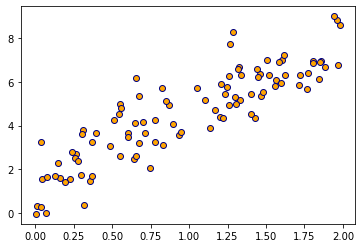

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)  # range[0..2]
y = 1.6 + 3 * X + np.random.randn(100, 1)

X_new = np.array([[0], [2]])

# print(X_new)
# fig,ax = plt.subplots(figsize=(12, 8))
plt.scatter(X,y, color = 'orange', edgecolor = 'navy')
print(X.shape)

## sklearn load_data() utilities

- [sklearn: Generated Datasets](https://scikit-learn.org/stable/datasets/index.html#sample-generators)
- [load_boston](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)

## Data used in keynote

In [ ]:
from scipy.io import loadmat
import statsmodels.api as sm

simple_x = np.array([2,9,5,5,3,7,1,8,6,2],dtype=np.float64)
simple_y = np.array([69,98,82,77,71,84,55,94,84,64],dtype=np.float64)

#
# for polynomial regression
#
poly_x = np.array([2, 9, 5, 5, 3, 7, 1, 8, 6, 2 ], dtype = np.float64)
poly_y = np.array([69, 92, 82, 72, 71, 84, 40, 94, 88, 59], dtype = np.float64)

wiki_x = np.array([1.47, 1.50, 1.52,1.55, 1.57, 
              1.60, 1.63, 1.65, 1.68, 1.70, 
              1.73, 1.75, 1.78, 1.80, 1.83 ], dtype = np.float64)
wiki_y = np.array([52.21, 53.12, 54.48, 55.84, 57.20,
             58.57, 59.93, 61.29, 63.11, 64.47, 
             66.28, 68.1, 69.92, 72.19, 74.46], 
            dtype = np.float64)

# EX5DATA = '1nNM8CN9CkRfjipRx1qJYZhSobmABVL1J'

fetch_gdrive_file(EX5DATA, os.path.join(data_dir, 'ex5datam1.mat'))
awdata = loadmat( os.path.join(data_dir, 'ex5datam1.mat'))

# # Load from ex5data1.mat, where all variables will be store in a dictionary

# # Extract train, test, validation data from dictionary
# # and also convert y's form 2-D matrix (MATLAB format) to a numpy vector
aw_x, aw_y = np.array(awdata['X']), np.array(awdata['y'])
aw_xtest, aw_ytest = np.array(awdata['Xtest']), np.array(awdata['ytest'])
aw_xval, aw_yval = np.array(awdata['Xval']), np.array(awdata['yval'])

Downloading...
From: https://drive.google.com/uc?id=1nNM8CN9CkRfjipRx1qJYZhSobmABVL1J
To: /content/drive/My Drive/adventures/regression/ex5datam1.mat
100%|██████████| 1.32k/1.32k [00:00<00:00, 1.52MB/s]


## Download UCI files

In [ ]:
sample_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'

In [ ]:
import zipfile, gzip, shutil

#
# Input: 
#    zip_file   : the compressed file ended with '.zip' or '.gz'
#    extract_to: the directory you want to put uncompressed file
#
#          Note that extract_to must be ended with '/'
#
def ungzip(zip_file, extract_to):
    gzfile = zip_file.split('/')[-1]
    new_name = os.path.join(extract_to, gzfile.split('.')[0])
    print('new name=', new_name)
    with gzip.open(zip_file, 'rb') as f_in:
        with open(new_name, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

def unzip(zip_file, extract_to):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        
def my_downloader(remote_url, extrac_to):
    fetch_file_via_requests(remote_url, extrac_to)
    local_name = remote_url.split('/')[-1]
    file_ext = remote_url.split('.')[-1]
    if (file_ext == 'zip'):
        unzip(os.path.join(extrac_to, local_name), data_dir)
    elif (file_ext == 'gz') or (file_ext == 'gzip'):
        ungzip(os.path.join(extrac_to, local_name), data_dir)
 
my_downloader(sample_url, data_dir)
print(f'data downloaded and stored in {data_dir}')

# 套件 sklearn & statsmodels

## sklearn.linear_model.LinearRegression

## statsmodels ols

- [add_constant](https://www.statsmodels.org/stable/generated/statsmodels.tools.tools.add_constant.html)
- [OLS](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html)

## Normal Equation

$\theta = (X^TX)^{-1}(X^Ty)$

In [ ]:
X_b = np.c_[np.ones((len(X), 1)), X]  # add x0 = 1 to each instance

# X_b = np.append(np.ones((len(X), 1)),X,axis=1) # alternative way to do this

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

# 如何畫散佈圖（scatter plot）？

## simple scatter plot

## seaborn regplot 

# Multivariate Regression

## CS229 Ex1-2

In [ ]:
fetch_file_via_requests(
    DropboxLink('90gzmvbih77fhnk', 'ex1data2.txt'), data_dir
)

## load_boston()

## ISLR adver.csv

In [ ]:
fetch_file_via_requests(
    DropboxLink('uev3kektwswh21c', 'adver.csv'), data_dir )

# Polynomial Regression

## polyfit

## sklearn Polynomail Features()

## Taiwan.CSV

In [ ]:
tw_csv = 'https://dl.dropboxusercontent.com/s/upr5klwy07bba3h/taiwan.csv'
fetch_file_via_requests(tw_csv, data_dir)

# 如何繪製學習曲線

- [sklearn plot_learning_curves demo](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)
- [sklearn learning_curve API](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve)
- [Learning curve](https://www.ritchieng.com/machinelearning-learning-curve/)

- [Evaluating Learing Algorithm](https://www.ritchieng.com/applying-machine-learning/)
- [Evaluating model performance: Generalization, Bias- Variance tradeoff and overfitting vs. underfitting |Part 2](https://www.intermediait.com/blog/2020/01/12/evaluating-model-performance-generalization-bias-variance-tradeoff-and-overfitting-vs-underfitting-part-2/)
- [YellowBrick LearningCurve](https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html)

$ y = 0.5 \times x^2 + x + 2 + randn(100,1)$

In [ ]:
m = 100
X1 = 6 * np.random.rand(m, 1) - 3
X = np.sort(X1)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

## ## 簡化版 sklearn plot_learning_curves()

- [click here for original version](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)

In [ ]:
from sklearn.model_selection import learning_curve

#
# Simplified version of plot_learning_curves presented in 
#   https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
#

def my_plot_leaning_curves(model, X, y, cv=None, scoring = None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
       
    fig,ax = plt.subplots(figsize = (10, 8))
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(model, X, y, cv=cv, n_jobs=n_jobs, 
                scoring = scoring,
                train_sizes=train_sizes,
                return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    ax.legend(loc="best")

## How to use

## DIY considerations

# Regularized Models

$y = 1 + 0.5 \times \frac{randn(20,1)}{1.5}$

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

## Ridge

## Lasso